# PROJECT DATA SCIENCE
#### Melanie Hoek 2ICT2  
  
  

De data gebruikt voor dit project bevat metingen van de Wifi signaal verzwakking op verschillende posities in de ICT-gang op Odisee. Aan de hand van deze data wordt het heel data mining proces doorlopen om meerdere modellen op te bouwen. Het doel van deze modellen is om de positie te voorspellen aan de hand van Wifi en een smartphone.  

In dit **Supervised** machine learning probleem worden er 3 waardes voorspeld:
1. De kamer
2. De absolute x positie tot over de linker boven hoek
3. De absolute y positie tot over de linker boven hoek 

De voorspelling van de kamer is een **multiclass classificatie** probleem, aangezien er een label moet voorspeld worden uit een mogelijke lijst van meerdere antwoorden.  
De voorspelling van de x en y positie is een **regressie** probleem, waarbij een continue waarden (een cijfer) voorspeld moet worden.

## Data inlezen en opkuisen

De eerste stap van het proces is de data inlezen en opkuisen. Het doel is om 1 groot Pandas Dataframe op te bouwen met al de data er in.


### Data opkuisen

De data wordt uit het bestand gelezen en direct in een dataframe gestoken. We bekomen een dataframe met 4 kolommen. De data in de kolommen bevat telkens nog de kolom titel, deze zal er in de volgende stap uit gefilterd worden. 

In [67]:
import pandas as pd
from IPython.display import display
import numpy as np

dataframe_data2 = pd.read_table('DataScienceData02.txt', sep='&', names=['Time', 'Sender', 'Location', 'WifiInfo'])

dataframe = pd.read_table('DataScienceData03.txt', sep='&', names=['Time', 'Sender', 'Location', 'WifiInfo'])

# Zet uit comentaar om data 2 en data 3 te gebruiken
#ataframe = dataframe.append(dataframe_data2, ignore_index=True)

display(dataframe.head())
display(dataframe.tail())
display(dataframe.info())

,Time,Sender,Location,WifiInfo
0,Time=21/05 09:32:30,Sender=A8:7D:12:54:24:6E,Location=docenten@0.34792;0.42874,"WifiInfo=TelenetWiFree@3a-43-3d-17-c3-3f:-87,..."
1,Time=21/05 09:32:48,Sender=A8:7D:12:54:24:6E,Location=docenten@0.02812;0.54771,WifiInfo=DIRECT-LRLAPTOP-4HQB4ID7msLF@a2-c5-8...
2,Time=21/05 09:33:00,Sender=A8:7D:12:54:24:6E,Location=docenten@0.56146;0.67754,"WifiInfo=campusroam@88-1d-fc-44-9c-23:-73,cam..."
3,Time=21/05 09:33:14,Sender=A8:7D:12:54:24:6E,Location=docenten@0.91771;0.6872,"WifiInfo=CiscoC5959@58-6d-8f-19-13-f4:-48,ODI..."
4,Time=21/05 09:33:25,Sender=A8:7D:12:54:24:6E,Location=docenten@0.90208;0.47464,"WifiInfo=ODISEEGuest@88-1d-fc-44-9c-21:-67,Gu..."


,Time,Sender,Location,WifiInfo
209,Time=22/05 04:22:40,Sender=44:6E:E5:C5:8F:4F,Location=Datacenter@0.89167;0.83368,"WifiInfo=rechts@58-6d-8f-19-10-fc:-60,eduroam..."
210,Time=22/05 04:24:15,Sender=44:6E:E5:C5:8F:4F,Location=D036@0.84271;0.86516,"WifiInfo=rechts@58-6d-8f-19-10-fc:-46,eduroam..."
211,Time=22/05 04:24:38,Sender=44:6E:E5:C5:8F:4F,Location=D036@0.84792;0.86653,"WifiInfo=rechts@58-6d-8f-19-10-fc:-40,eduroam..."
212,Time=22/05 04:25:08,Sender=44:6E:E5:C5:8F:4F,Location=D036@0.84479;0.6167,"WifiInfo=rechts@58-6d-8f-19-10-fc:-49,ODISEE@..."
213,Time=22/05 04:25:43,Sender=44:6E:E5:C5:8F:4F,Location=D036@0.41979;0.66667,"WifiInfo=rechts@58-6d-8f-19-10-fc:-52,ODISEE@..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 4 columns):
Time        214 non-null object
Sender      214 non-null object
Location    214 non-null object
WifiInfo    214 non-null object
dtypes: object(4)
memory usage: 6.8+ KB


None

Om de data op te kuisen wordt eerst de kolom naam uit de data gehaald.

De Location kolom bevat momenteel al de targets van dit onderzoek, we gaan deze targets elk in hun eigen kolom zetten door de Location kolom op de splitsen. De X_loc en Y_loc kolommen krijgen dan het datatype float.

In [68]:
# kolom namen weghalen uit de data
for c in dataframe:
    dataframe[c] = dataframe[c].str.split(pat = "=").str[1];

#locatie opsliptsen in relatieve x and y coordinaten
dataframe[['Room','X_loc', 'Y_loc']] = dataframe.pop('Location').str.replace(';', '@').str.split('@', expand=True)

dataframe = dataframe.astype({'X_loc': float, 'Y_loc': float})

display(dataframe.head())
display(dataframe.tail())
display(dataframe.info())

,Time,Sender,WifiInfo,Room,X_loc,Y_loc
0,21/05 09:32:30,A8:7D:12:54:24:6E,"TelenetWiFree@3a-43-3d-17-c3-3f:-87,telenet-6F...",docenten,0.34792,0.42874
1,21/05 09:32:48,A8:7D:12:54:24:6E,DIRECT-LRLAPTOP-4HQB4ID7msLF@a2-c5-89-be-c2-b5...,docenten,0.02812,0.54771
2,21/05 09:33:00,A8:7D:12:54:24:6E,"campusroam@88-1d-fc-44-9c-23:-73,campusroam@88...",docenten,0.56146,0.67754
3,21/05 09:33:14,A8:7D:12:54:24:6E,"CiscoC5959@58-6d-8f-19-13-f4:-48,ODISEEGuest@8...",docenten,0.91771,0.68720
4,21/05 09:33:25,A8:7D:12:54:24:6E,"ODISEEGuest@88-1d-fc-44-9c-21:-67,Guest-Orange...",docenten,0.90208,0.47464


,Time,Sender,WifiInfo,Room,X_loc,Y_loc
209,22/05 04:22:40,44:6E:E5:C5:8F:4F,"rechts@58-6d-8f-19-10-fc:-60,eduroam@88-1d-fc-...",Datacenter,0.89167,0.83368
210,22/05 04:24:15,44:6E:E5:C5:8F:4F,"rechts@58-6d-8f-19-10-fc:-46,eduroam@88-1d-fc-...",D036,0.84271,0.86516
211,22/05 04:24:38,44:6E:E5:C5:8F:4F,"rechts@58-6d-8f-19-10-fc:-40,eduroam@88-1d-fc-...",D036,0.84792,0.86653
212,22/05 04:25:08,44:6E:E5:C5:8F:4F,"rechts@58-6d-8f-19-10-fc:-49,ODISEE@88-1d-fc-3...",D036,0.84479,0.61670
213,22/05 04:25:43,44:6E:E5:C5:8F:4F,"rechts@58-6d-8f-19-10-fc:-52,ODISEE@88-1d-fc-3...",D036,0.41979,0.66667


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 6 columns):
Time        214 non-null object
Sender      214 non-null object
WifiInfo    214 non-null object
Room        214 non-null object
X_loc       214 non-null float64
Y_loc       214 non-null float64
dtypes: float64(2), object(4)
memory usage: 10.1+ KB


None

### Absolute X en Y coördinaten

Momenteel bevat de data de x en y coördinaten van een meting in een specifiek lokaal. Om een beteren voorspelling te kunnen maken gaan we deze coördinaten om zetten naar de absolute coördinaten in de ICT-gang.  
Hiervoor wordt er een dataframe opgesteld dat voor elk lokaal in de ICT gang de lengte (y), breedte (x) en de relatieve x en y coördinaten weer geeft. Deze waardes komen uit de grond plannen van de ICT-gang.

In [3]:
rooms = [{'name':'K.VanAssche', 'y':4.43, 'x':4.40, 'rel_x':0, 'rel_y':0}, 
    {'name':'lab1', 'y':7.68, 'x':8.02, 'rel_x':12.18, 'rel_y':2.25}, 
    {'name':'lab2', 'y':9.05, 'x':8.02, 'rel_x':12.18, 'rel_y':13.93}, 
    {'name':'lab3', 'y':11.02, 'x':8.02, 'rel_x':12.18, 'rel_y':22.98}, 
    {'name':'lab4', 'y':8.025, 'x':9, 'rel_x':0, 'rel_y':25.975}, 
    {'name':'lab5', 'y':8.025, 'x':9, 'rel_x':0, 'rel_y':17.95}, 
    {'name':'lab6', 'y':9, 'x':9.03, 'rel_x':0, 'rel_y':8.95},
    {'name':'P.Demeester', 'y':4.52, 'x':4.40, 'rel_x':0, 'rel_y':4.43},
    {'name':'projectlokaal', 'y':6.08, 'x':7.1, 'rel_x':1.9, 'rel_y':36},
    {'name':'D036', 'y':3.25, 'x':4.4, 'rel_x':4.4, 'rel_y':5.7},
    {'name':'Datacenter', 'y':3, 'x':4.6, 'rel_x':4.4, 'rel_y':0},
    {'name':'docenten', 'y':9, 'x':8.05, 'rel_x':12.18, 'rel_y':34},
    {'name':'gang', 'y':36 , 'x':3.18, 'rel_x':9, 'rel_y':0}]

dfRooms = pd.DataFrame(rooms)
dfRooms.set_index('name', inplace=True)

display(dfRooms)

,rel_x,rel_y,x,y
name,,,,
K.VanAssche,0.00,0.000,4.40,4.430
lab1,12.18,2.250,8.02,7.680
lab2,12.18,13.930,8.02,9.050
lab3,12.18,22.980,8.02,11.020
lab4,0.00,25.975,9.00,8.025
lab5,0.00,17.950,9.00,8.025
lab6,0.00,8.950,9.03,9.000
P.Demeester,0.00,4.430,4.40,4.520
projectlokaal,1.90,36.000,7.10,6.080


De methodes ***calc_abs_x*** en ***calc_abs_y*** berekenen de absolute x en y coördinaten van elke meting aan de hand van de kamer waarin de meting plaats nam en de relatieve x en y coördinaten van die meting.

Deze twee methodes worden toegepast op elke meting en er wordt een kolom toegevoegd aan het dataframe voor beide waardes.

In [4]:
def calc_abs_x (row):
    return dfRooms.loc[row['Room']]['x'] * row['X_loc'] + dfRooms.loc[row['Room']]['rel_x']

def calc_abs_y (row):
    return dfRooms.loc[row['Room']]['y'] * row['Y_loc'] + dfRooms.loc[row['Room']]['rel_y']

dataframe['abs_x'] = dataframe.apply(calc_abs_x, axis=1)
dataframe['abs_y'] = dataframe.apply(calc_abs_y, axis=1)

display(dataframe.head())
display(dataframe.info())

,Time,Sender,WifiInfo,Room,X_loc,Y_loc,abs_x,abs_y
0,21/05 09:32:30,A8:7D:12:54:24:6E,"TelenetWiFree@3a-43-3d-17-c3-3f:-87,telenet-6F...",docenten,0.34792,0.42874,14.980756,37.85866
1,21/05 09:32:48,A8:7D:12:54:24:6E,DIRECT-LRLAPTOP-4HQB4ID7msLF@a2-c5-89-be-c2-b5...,docenten,0.02812,0.54771,12.406366,38.92939
2,21/05 09:33:00,A8:7D:12:54:24:6E,"campusroam@88-1d-fc-44-9c-23:-73,campusroam@88...",docenten,0.56146,0.67754,16.699753,40.09786
3,21/05 09:33:14,A8:7D:12:54:24:6E,"CiscoC5959@58-6d-8f-19-13-f4:-48,ODISEEGuest@8...",docenten,0.91771,0.68720,19.567566,40.18480
4,21/05 09:33:25,A8:7D:12:54:24:6E,"ODISEEGuest@88-1d-fc-44-9c-21:-67,Guest-Orange...",docenten,0.90208,0.47464,19.441744,38.27176


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 8 columns):
Time        214 non-null object
Sender      214 non-null object
WifiInfo    214 non-null object
Room        214 non-null object
X_loc       214 non-null float64
Y_loc       214 non-null float64
abs_x       214 non-null float64
abs_y       214 non-null float64
dtypes: float64(4), object(4)
memory usage: 13.5+ KB


None

### WifiInfo

De **WifiInfo** kolom wordt opgesplitst in al de verschillende signalen.
Hiervan wordt het SSID (de naam) weg gelaten en dan een kolom gemaakt voor elk uniek BSSID (MAC adders van het acces punt).

In [5]:
wifiInfo = np.array(dataframe.pop('WifiInfo').str.split(','))

dictWifi = []

for r in wifiInfo:
     dictWifi.append(dict(zip([v.split(':')[0][-18:] for v in r], [v.split(':')[1] for v in r])))
        
wifiDf = pd.DataFrame(dictWifi, dtype=float)

display(wifiDf.head())
display(wifiDf.tail())

print('Shape: {}'.format(wifiDf.shape))

,@00-19-70-24-26-ab,@00-1d-6a-a4-ae-6a,@00-1e-94-02-0f-28,@00-78-9e-69-a6-bb,@00-95-69-a9-04-52,@02-35-3b-67-ae-0c,@02-35-3b-ac-31-c0,@02-35-3b-bc-9f-76,@02-53-7c-16-06-10,@02-53-7c-36-ec-78,...,@dc-53-7c-36-ec-77,@dc-53-7c-45-b1-3f,@dc-53-7c-85-46-82,@dc-53-7c-de-e7-c6,@dc-53-7c-e1-c2-0f,@de-53-3c-de-e7-c6,@de-53-3c-e1-c2-0f,@fa-8f-ca-62-b9-1c,@fa-8f-ca-65-c3-70,@fa-8f-ca-82-ea-e2
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,-89.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-86.0,NaN,-87.0,NaN,NaN,NaN,NaN
4,-89.0,NaN,NaN,-83.0,NaN,NaN,-87.0,NaN,NaN,NaN,...,NaN,NaN,NaN,-79.0,NaN,-83.0,NaN,NaN,NaN,NaN


,@00-19-70-24-26-ab,@00-1d-6a-a4-ae-6a,@00-1e-94-02-0f-28,@00-78-9e-69-a6-bb,@00-95-69-a9-04-52,@02-35-3b-67-ae-0c,@02-35-3b-ac-31-c0,@02-35-3b-bc-9f-76,@02-53-7c-16-06-10,@02-53-7c-36-ec-78,...,@dc-53-7c-36-ec-77,@dc-53-7c-45-b1-3f,@dc-53-7c-85-46-82,@dc-53-7c-de-e7-c6,@dc-53-7c-e1-c2-0f,@de-53-3c-de-e7-c6,@de-53-3c-e1-c2-0f,@fa-8f-ca-62-b9-1c,@fa-8f-ca-65-c3-70,@fa-8f-ca-82-ea-e2
209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Shape: (214, 111)


### Omgaan met NaN's

Er zijn momenteel veel NaN's in de tabel. Dit is omdat niet elk acces punt bereikbaar is op elke meting. Hieronder is een weergaven van het percentage van NaN's in de 20 kolommen met het meeste NaN's.

In [6]:
pd.DataFrame((wifiDf.isnull().mean() * 100).round(2).sort_values(ascending=False).head(20), columns=['percentage'])

,percentage
@84-a1-d1-4a-17-0e,99.53
@88-1d-fc-44-a6-81,99.53
@14-6b-9c-34-75-e0,99.53
@0c-8c-24-25-e0-41,99.53
@0c-8c-24-25-db-b9,99.53
@06-35-3b-ac-31-c2,99.53
@06-35-3b-67-ae-0e,99.53
@ac-22-05-8d-0e-db,99.53
@ae-22-35-8d-0e-db,99.53
@88-1d-fc-44-a6-83,99.53


Er zijn verschillende manieren om met NaN's om te gaan in een onderzoek.

Eén manier is om al de rijen die NaN's bevatten uit de dataset te halen. Aangezien elke rij wel een NaN bevat is dit geen goed idee voor dit onderzoek.
Een alternatief is het gemiddelde nemen van elke kolom en deze waarden te gebruiken in de plaats van de NaN's, dit is zeker geen goed idee voor dit onderzoek aangezien het de data compleet zou veranderen.

De oplossing waarvoor ik gekozen heb, is om all de NaN's te veranderen door -110, deze verzwakking waarden betekend dat er geen signaal van dat netwerk te vinden is op dat punt.

In [7]:
wifiDf.fillna(-110, inplace=True)

display(wifiDf.head())

,@00-19-70-24-26-ab,@00-1d-6a-a4-ae-6a,@00-1e-94-02-0f-28,@00-78-9e-69-a6-bb,@00-95-69-a9-04-52,@02-35-3b-67-ae-0c,@02-35-3b-ac-31-c0,@02-35-3b-bc-9f-76,@02-53-7c-16-06-10,@02-53-7c-36-ec-78,...,@dc-53-7c-36-ec-77,@dc-53-7c-45-b1-3f,@dc-53-7c-85-46-82,@dc-53-7c-de-e7-c6,@dc-53-7c-e1-c2-0f,@de-53-3c-de-e7-c6,@de-53-3c-e1-c2-0f,@fa-8f-ca-62-b9-1c,@fa-8f-ca-65-c3-70,@fa-8f-ca-82-ea-e2
0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,...,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0
1,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,...,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0
2,-110.0,-110.0,-110.0,-89.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,...,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0
3,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,...,-110.0,-110.0,-110.0,-86.0,-110.0,-87.0,-110.0,-110.0,-110.0,-110.0
4,-89.0,-110.0,-110.0,-83.0,-110.0,-110.0,-87.0,-110.0,-110.0,-110.0,...,-110.0,-110.0,-110.0,-79.0,-110.0,-83.0,-110.0,-110.0,-110.0,-110.0


### Het dataframe

In [8]:
dataframe = pd.concat([dataframe, wifiDf], axis=1, sort=False)
dataframe = dataframe.sort_values(by=['Room'])
display(dataframe.head())
display(dataframe.tail())
print('Shape: {}'.format(dataframe.shape))

,Time,Sender,Room,X_loc,Y_loc,abs_x,abs_y,@00-19-70-24-26-ab,@00-1d-6a-a4-ae-6a,@00-1e-94-02-0f-28,...,@dc-53-7c-36-ec-77,@dc-53-7c-45-b1-3f,@dc-53-7c-85-46-82,@dc-53-7c-de-e7-c6,@dc-53-7c-e1-c2-0f,@de-53-3c-de-e7-c6,@de-53-3c-e1-c2-0f,@fa-8f-ca-62-b9-1c,@fa-8f-ca-65-c3-70,@fa-8f-ca-82-ea-e2
213,22/05 04:25:43,44:6E:E5:C5:8F:4F,D036,0.41979,0.66667,6.247076,7.866677,-110.0,-110.0,-110.0,...,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0
185,22/05 10:36:57,A8:7D:12:54:24:6E,D036,0.75000,0.08031,7.700000,5.961008,-110.0,-110.0,-110.0,...,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-75.0,-110.0
184,22/05 10:36:38,A8:7D:12:54:24:6E,D036,0.14896,0.09843,5.055424,6.019897,-110.0,-110.0,-110.0,...,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-75.0,-110.0
165,21/05 03:21:24,A8:7D:12:54:24:6E,D036,0.50833,0.95169,6.636652,8.792993,-110.0,-110.0,-78.0,...,-110.0,-110.0,-81.0,-110.0,-110.0,-110.0,-110.0,-110.0,-84.0,-110.0
164,21/05 03:21:09,A8:7D:12:54:24:6E,D036,0.79688,0.76268,7.906272,8.178710,-110.0,-110.0,-110.0,...,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0


,Time,Sender,Room,X_loc,Y_loc,abs_x,abs_y,@00-19-70-24-26-ab,@00-1d-6a-a4-ae-6a,@00-1e-94-02-0f-28,...,@dc-53-7c-36-ec-77,@dc-53-7c-45-b1-3f,@dc-53-7c-85-46-82,@dc-53-7c-de-e7-c6,@dc-53-7c-e1-c2-0f,@de-53-3c-de-e7-c6,@de-53-3c-e1-c2-0f,@fa-8f-ca-62-b9-1c,@fa-8f-ca-65-c3-70,@fa-8f-ca-82-ea-e2
199,22/05 10:47:49,A8:7D:12:54:24:6E,projectlokaal,0.84375,0.89251,7.890625,41.426461,-110.0,-110.0,-110.0,...,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-89.0,-110.0
198,22/05 10:47:37,A8:7D:12:54:24:6E,projectlokaal,0.30521,0.93841,4.066991,41.705533,-110.0,-110.0,-110.0,...,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0
197,22/05 10:47:13,A8:7D:12:54:24:6E,projectlokaal,0.33333,0.47283,4.266643,38.874806,-110.0,-110.0,-110.0,...,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0
113,21/05 02:51:36,A8:7D:12:54:24:6E,projectlokaal,0.48646,0.37198,5.353866,38.261638,-110.0,-110.0,-110.0,...,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0
106,21/05 02:49:33,44:6E:E5:C5:8F:4F,projectlokaal,0.40625,0.06776,4.784375,36.411981,-110.0,-110.0,-110.0,...,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0


Shape: (214, 118)


## Data analyseren en in beeld brengen

In de tweede stap analyseren we de eigenschappen van de data.

### Eigenschappen van de kolomen

De onderliggende tabel toont de eigenschappen van de data in elke kolom.

Hierin kunnen we zien dat de absolute x coördinaten tussen 0 en 20 liggen en de absolute y coördinaten tussen 0 en 42.
De 50% waardes liggen ongeveer in de helft van de minimum en maximum waarde voor de absolute x en y coördinaten, dit is goed want het toont aan dat de metingen goed verspreid liggen over de gang.

In [9]:
dataframe.describe()

,X_loc,Y_loc,abs_x,abs_y,@00-19-70-24-26-ab,@00-1d-6a-a4-ae-6a,@00-1e-94-02-0f-28,@00-78-9e-69-a6-bb,@00-95-69-a9-04-52,@02-35-3b-67-ae-0c,...,@dc-53-7c-36-ec-77,@dc-53-7c-45-b1-3f,@dc-53-7c-85-46-82,@dc-53-7c-de-e7-c6,@dc-53-7c-e1-c2-0f,@de-53-3c-de-e7-c6,@de-53-3c-e1-c2-0f,@fa-8f-ca-62-b9-1c,@fa-8f-ca-65-c3-70,@fa-8f-ca-82-ea-e2
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,...,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,0.543088,0.507791,9.168917,19.026647,-109.425234,-108.892523,-109.850467,-109.200935,-109.878505,-109.850467,...,-109.635514,-106.532710,-105.271028,-109.607477,-109.462617,-109.766355,-109.373832,-108.546729,-105.556075,-109.710280
std,0.312139,0.323991,5.746689,13.410966,3.397254,4.576182,2.187475,4.366088,1.777323,1.543143,...,2.649803,9.695183,11.175569,3.318060,3.482485,2.418937,3.707684,6.076597,10.310400,3.028842
min,0.025000,0.019160,0.330000,0.230070,-110.000000,-110.000000,-110.000000,-110.000000,-110.000000,-110.000000,...,-110.000000,-110.000000,-110.000000,-110.000000,-110.000000,-110.000000,-110.000000,-110.000000,-110.000000,-110.000000
25%,0.253383,0.184803,4.074618,6.747227,-110.000000,-110.000000,-110.000000,-110.000000,-110.000000,-110.000000,...,-110.000000,-110.000000,-110.000000,-110.000000,-110.000000,-110.000000,-110.000000,-110.000000,-110.000000,-110.000000
50%,0.558335,0.520190,8.390936,17.452165,-110.000000,-110.000000,-110.000000,-110.000000,-110.000000,-110.000000,...,-110.000000,-110.000000,-110.000000,-110.000000,-110.000000,-110.000000,-110.000000,-110.000000,-110.000000,-110.000000
75%,0.843490,0.828368,13.034210,32.412264,-110.000000,-110.000000,-110.000000,-110.000000,-110.000000,-110.000000,...,-110.000000,-110.000000,-110.000000,-110.000000,-110.000000,-110.000000,-110.000000,-110.000000,-110.000000,-110.000000
max,0.979170,0.981520,20.032943,42.587260,-89.000000,-87.000000,-78.000000,-83.000000,-84.000000,-94.000000,...,-90.000000,-72.000000,-65.000000,-79.000000,-87.000000,-83.000000,-86.000000,-76.000000,-74.000000,-74.000000


Hieronder wordt gekeken naar het aantal metingen in elke kamer. Het is belangrijk dat er in elke kamer genoeg metingen zijn om een goed model te bekomen.

In [10]:
import matplotlib.pyplot as plt

meetingen_per_room = dataframe['Room'].value_counts();

display(meetingen_per_room)
plt.pie(meetingen_per_room, labels=meetingen_per_room.index, radius=2)
plt.plot()

gang             27
docenten         22
lab6             19
projectlokaal    16
Datacenter       15
lab3             15
lab5             15
lab4             15
lab1             15
lab2             14
K.VanAssche      14
P.Demeester      14
D036             13
Name: Room, dtype: int64

[]

Het MAC adres van het toestel waarop de metingen gedaan worden wordt ook mee gegeven in de data. Het toestel kan mogelijk een invloed hebben op de verzwakking dat gemeten wordt. Momenteel zijn er maar 2 toestellen in onze dataset.

In [11]:
no_senders = dataframe['Sender'].value_counts();

display(no_senders)
print("Aantal verschillende toestellen: {}".format(no_senders.size))

44:6E:E5:C5:8F:4F    109
A8:7D:12:54:24:6E    105
Name: Sender, dtype: int64

Aantal verschillende toestellen: 2


### Visualisatie van de metingen

De scatterplot toont visueel de positie en de kamer aan van elke metingen.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[]

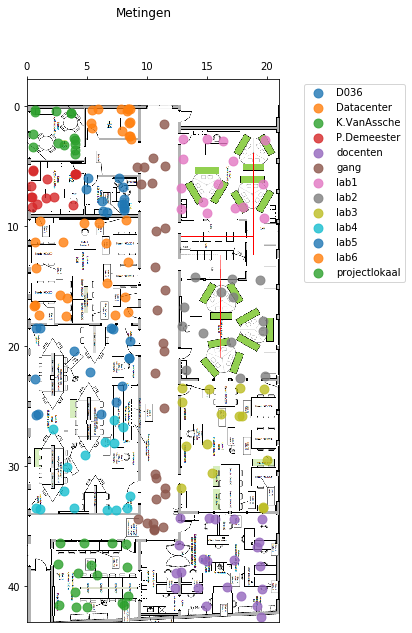

In [12]:
import matplotlib.pyplot as plt
from scipy.ndimage import rotate

img = plt.imread("images/ikdoeict.png")
rot = rotate(img, 180, reshape=False)
flip = np.fliplr(rot);

fig, ax = plt.subplots()
    
ax.imshow(flip, extent=[0, 21, 0, 43])
fig.set_size_inches(10, 10)
    
fig.suptitle("Metingen")

for name, group in dataframe.groupby('Room'):
    plt.scatter(data=group, x='abs_x', y='abs_y', alpha=0.8, label=name, s=80)
    
ax.set_ylim(ax.get_ylim()[::-1])
ax.xaxis.tick_top()
ax.legend(loc='upper center', bbox_to_anchor=(1.3, 1), ncol=1)

plt.plot()

## Feature Selectie

De derde stap van het data mining proces, de feature selectie is een cruciale stap. De niet relevante features worden afgetrokken zo dat alleen nog maar de belangrijke features overblijven. Op basis van de overblijvende features wordt dan het model opgebouwd.

Het supervised machine learning model kan alleen maar leren van de data dat er aan mee gegeven wordt, dus het is belangrijk om te zorgen dat al de relevante data mee geleverd wordt.

Als eerste worden de targets apart gehouden van de features.

In [13]:
X_room = dataframe['Room']
X_loc = dataframe[['X_loc','Y_loc','abs_x','abs_y']]

display(X_room.head())
display(X_loc.head())

213    D036
185    D036
184    D036
165    D036
164    D036
Name: Room, dtype: object

,X_loc,Y_loc,abs_x,abs_y
213,0.41979,0.66667,6.247076,7.866677
185,0.75000,0.08031,7.700000,5.961008
184,0.14896,0.09843,5.055424,6.019897
165,0.50833,0.95169,6.636652,8.792993
164,0.79688,0.76268,7.906272,8.178710


### Correlatie tussen target en feature

We willen kijken naar de correlatie tussen de features en de 3 targets. Om dit te doen moeten we de target 'Room' omzetten naar een numerieke waarde.

In [14]:
dataframe['Room'] = dataframe['Room'].astype('category').cat.codes

display(dataframe.head())
display(dataframe.tail())

,Time,Sender,Room,X_loc,Y_loc,abs_x,abs_y,@00-19-70-24-26-ab,@00-1d-6a-a4-ae-6a,@00-1e-94-02-0f-28,...,@dc-53-7c-36-ec-77,@dc-53-7c-45-b1-3f,@dc-53-7c-85-46-82,@dc-53-7c-de-e7-c6,@dc-53-7c-e1-c2-0f,@de-53-3c-de-e7-c6,@de-53-3c-e1-c2-0f,@fa-8f-ca-62-b9-1c,@fa-8f-ca-65-c3-70,@fa-8f-ca-82-ea-e2
213,22/05 04:25:43,44:6E:E5:C5:8F:4F,0,0.41979,0.66667,6.247076,7.866677,-110.0,-110.0,-110.0,...,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0
185,22/05 10:36:57,A8:7D:12:54:24:6E,0,0.75000,0.08031,7.700000,5.961008,-110.0,-110.0,-110.0,...,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-75.0,-110.0
184,22/05 10:36:38,A8:7D:12:54:24:6E,0,0.14896,0.09843,5.055424,6.019897,-110.0,-110.0,-110.0,...,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-75.0,-110.0
165,21/05 03:21:24,A8:7D:12:54:24:6E,0,0.50833,0.95169,6.636652,8.792993,-110.0,-110.0,-78.0,...,-110.0,-110.0,-81.0,-110.0,-110.0,-110.0,-110.0,-110.0,-84.0,-110.0
164,21/05 03:21:09,A8:7D:12:54:24:6E,0,0.79688,0.76268,7.906272,8.178710,-110.0,-110.0,-110.0,...,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0


,Time,Sender,Room,X_loc,Y_loc,abs_x,abs_y,@00-19-70-24-26-ab,@00-1d-6a-a4-ae-6a,@00-1e-94-02-0f-28,...,@dc-53-7c-36-ec-77,@dc-53-7c-45-b1-3f,@dc-53-7c-85-46-82,@dc-53-7c-de-e7-c6,@dc-53-7c-e1-c2-0f,@de-53-3c-de-e7-c6,@de-53-3c-e1-c2-0f,@fa-8f-ca-62-b9-1c,@fa-8f-ca-65-c3-70,@fa-8f-ca-82-ea-e2
199,22/05 10:47:49,A8:7D:12:54:24:6E,12,0.84375,0.89251,7.890625,41.426461,-110.0,-110.0,-110.0,...,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-89.0,-110.0
198,22/05 10:47:37,A8:7D:12:54:24:6E,12,0.30521,0.93841,4.066991,41.705533,-110.0,-110.0,-110.0,...,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0
197,22/05 10:47:13,A8:7D:12:54:24:6E,12,0.33333,0.47283,4.266643,38.874806,-110.0,-110.0,-110.0,...,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0
113,21/05 02:51:36,A8:7D:12:54:24:6E,12,0.48646,0.37198,5.353866,38.261638,-110.0,-110.0,-110.0,...,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0
106,21/05 02:49:33,44:6E:E5:C5:8F:4F,12,0.40625,0.06776,4.784375,36.411981,-110.0,-110.0,-110.0,...,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0


Hieronder wordt gekeken naar de correlatie tussen de features en de targets, voor elke target worden al features met een correlatie hoger dan 0.5 verder mee genomen in het proces.

In [15]:
corr = dataframe.corr()
cor_room_x = abs(corr['Room'])
cor_target_x = abs(corr['abs_x'])
cor_target_y = abs(corr['abs_y'])

relevant_features_room = cor_room_x[cor_room_x>0.5]
display(relevant_features_room)

relevant_features_y = cor_target_y[cor_target_y>0.5]
display(relevant_features_y)

relevant_features_x = cor_target_x[cor_target_x>0.5]
display(relevant_features_x)

features = dataframe[relevant_features_y.index | relevant_features_x.index | relevant_features_room.index] 

display(features.head())

Room                  1.000000
@88-1d-fc-44-9c-20    0.557416
@88-1d-fc-44-9c-21    0.555472
@88-1d-fc-44-9c-22    0.570065
@88-1d-fc-44-9c-23    0.522787
Name: Room, dtype: float64

abs_y                 1.000000
@38-43-7d-17-c3-3f    0.644949
@3a-43-3d-17-c3-3f    0.637896
@58-6d-8f-19-10-fc    0.813202
@58-6d-8f-19-13-f4    0.754775
@58-6d-8f-19-14-38    0.659813
@88-1d-fc-41-dc-50    0.549140
@88-1d-fc-41-dc-52    0.550160
@88-1d-fc-44-9c-20    0.817912
@88-1d-fc-44-9c-21    0.818930
@88-1d-fc-44-9c-22    0.820864
@88-1d-fc-44-9c-23    0.793575
@94-91-7f-5a-20-d2    0.738281
@96-91-7f-5a-20-d3    0.729337
@9c-97-26-98-ce-e7    0.500191
@a2-c5-89-be-c2-b5    0.539172
@c8-d7-19-6f-be-b7    0.638060
Name: abs_y, dtype: float64

abs_x                 1.000000
@58-6d-8f-19-11-48    0.555572
@58-6d-8f-19-13-f4    0.509678
@9c-97-26-98-ce-e7    0.529010
Name: abs_x, dtype: float64

,@38-43-7d-17-c3-3f,@3a-43-3d-17-c3-3f,@58-6d-8f-19-10-fc,@58-6d-8f-19-11-48,@58-6d-8f-19-13-f4,@58-6d-8f-19-14-38,@88-1d-fc-41-dc-50,@88-1d-fc-41-dc-52,@88-1d-fc-44-9c-20,@88-1d-fc-44-9c-21,@88-1d-fc-44-9c-22,@88-1d-fc-44-9c-23,@94-91-7f-5a-20-d2,@96-91-7f-5a-20-d3,@9c-97-26-98-ce-e7,@a2-c5-89-be-c2-b5,@c8-d7-19-6f-be-b7,Room,abs_x,abs_y
213,-110.0,-110.0,-52.0,-81.0,-110.0,-82.0,-110.0,-110.0,-110.0,-79.0,-78.0,-80.0,-110.0,-85.0,-83.0,-110.0,-78.0,0,6.247076,7.866677
185,-110.0,-110.0,-46.0,-68.0,-110.0,-75.0,-110.0,-110.0,-78.0,-81.0,-83.0,-77.0,-74.0,-75.0,-78.0,-110.0,-54.0,0,7.700000,5.961008
184,-110.0,-110.0,-36.0,-68.0,-110.0,-85.0,-110.0,-86.0,-82.0,-80.0,-80.0,-82.0,-80.0,-80.0,-85.0,-110.0,-56.0,0,5.055424,6.019897
165,-110.0,-110.0,-34.0,-110.0,-80.0,-74.0,-110.0,-110.0,-86.0,-88.0,-88.0,-86.0,-72.0,-84.0,-91.0,-110.0,-64.0,0,6.636652,8.792993
164,-110.0,-110.0,-45.0,-110.0,-110.0,-73.0,-110.0,-110.0,-90.0,-89.0,-110.0,-88.0,-110.0,-80.0,-110.0,-110.0,-65.0,0,7.906272,8.178710


### Correlatie tussen de features

Deze heatmap is een visuele weergaven van de onderlingen correlatie tussen de overblijvende features.  

Features die een hoge correlatie hebben met elkaar worden **collinear** genoemd. Het is niet nodig om in dat geval beide features op te nemen in het model. Eén van deze features weg laten zal ons helpen om het model te generaliseren en meer interpretabel te maken.

In [16]:
features.drop(['abs_x', 'abs_y', 'Room'], axis=1, inplace=True)

C:\Users\melan\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


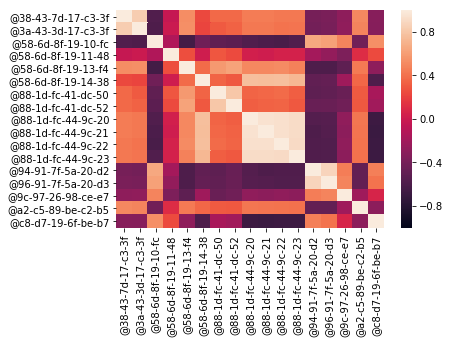

In [17]:
import seaborn as sns

corr = features.corr()

sns.heatmap(corr, vmin=-1)

Als er een correlatie van meer dan 0,9 is tussen twee features wordt maar één van de twee verder genomen. 

In [18]:
# Drop 1 van de 2 features met een onderlingen correlatie van > 0.9
print("Vorm voor: {}".format(features.shape))

columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = features.columns[columns]
features = features[selected_columns]

print("Vorm na: {}".format(features.shape))

Vorm voor: (214, 17)
Vorm na: (214, 14)


### Features voor het model 

De ***Time*** en ***Sender*** features worden niet mee genomen in het voorspellen van de modellen. Het is natuurlijk mogelijk dat de sterkte van de signalen wel beïnvloed worden door het toestel waarop dat de metingen gedaan worden maar door het beperkt aantal toestellen in de data ga ik deze feature niet op nemen.

In [19]:
print("Aantal feature mee genomen in het model {}".format(len(features.columns)))
display(features.head())
display(features.tail())

Aantal feature mee genomen in het model 14


,@38-43-7d-17-c3-3f,@3a-43-3d-17-c3-3f,@58-6d-8f-19-10-fc,@58-6d-8f-19-11-48,@58-6d-8f-19-13-f4,@58-6d-8f-19-14-38,@88-1d-fc-41-dc-50,@88-1d-fc-41-dc-52,@88-1d-fc-44-9c-20,@94-91-7f-5a-20-d2,@96-91-7f-5a-20-d3,@9c-97-26-98-ce-e7,@a2-c5-89-be-c2-b5,@c8-d7-19-6f-be-b7
213,-110.0,-110.0,-52.0,-81.0,-110.0,-82.0,-110.0,-110.0,-110.0,-110.0,-85.0,-83.0,-110.0,-78.0
185,-110.0,-110.0,-46.0,-68.0,-110.0,-75.0,-110.0,-110.0,-78.0,-74.0,-75.0,-78.0,-110.0,-54.0
184,-110.0,-110.0,-36.0,-68.0,-110.0,-85.0,-110.0,-86.0,-82.0,-80.0,-80.0,-85.0,-110.0,-56.0
165,-110.0,-110.0,-34.0,-110.0,-80.0,-74.0,-110.0,-110.0,-86.0,-72.0,-84.0,-91.0,-110.0,-64.0
164,-110.0,-110.0,-45.0,-110.0,-110.0,-73.0,-110.0,-110.0,-90.0,-110.0,-80.0,-110.0,-110.0,-65.0


,@38-43-7d-17-c3-3f,@3a-43-3d-17-c3-3f,@58-6d-8f-19-10-fc,@58-6d-8f-19-11-48,@58-6d-8f-19-13-f4,@58-6d-8f-19-14-38,@88-1d-fc-41-dc-50,@88-1d-fc-41-dc-52,@88-1d-fc-44-9c-20,@94-91-7f-5a-20-d2,@96-91-7f-5a-20-d3,@9c-97-26-98-ce-e7,@a2-c5-89-be-c2-b5,@c8-d7-19-6f-be-b7
199,-80.0,-80.0,-82.0,-110.0,-80.0,-67.0,-110.0,-110.0,-53.0,-110.0,-90.0,-110.0,-110.0,-110.0
198,-80.0,-78.0,-85.0,-110.0,-67.0,-62.0,-90.0,-87.0,-54.0,-110.0,-110.0,-110.0,-110.0,-92.0
197,-110.0,-89.0,-110.0,-78.0,-70.0,-56.0,-110.0,-110.0,-47.0,-110.0,-110.0,-110.0,-110.0,-110.0
113,-110.0,-84.0,-110.0,-110.0,-67.0,-57.0,-78.0,-78.0,-47.0,-110.0,-110.0,-110.0,-110.0,-110.0
106,-110.0,-110.0,-110.0,-110.0,-85.0,-58.0,-110.0,-78.0,-57.0,-110.0,-110.0,-110.0,-110.0,-110.0


### Visualisatie van elk access punt

Voor de eerste 5 acces punten die overblijven in de features wordt er een scatter plot getekend. De punten worden geplot aan de hand van hun relatieve x en y coördinaten op een map van de ICT-gang. De kleur van het punt is afhankelijk van de verzwakking van de meting.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


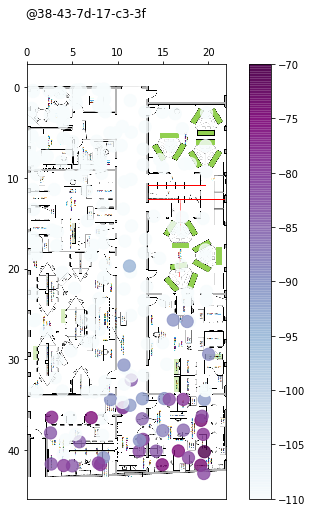

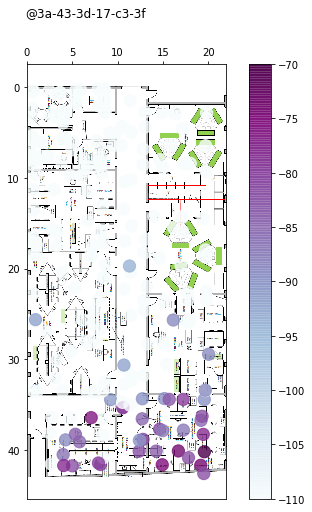

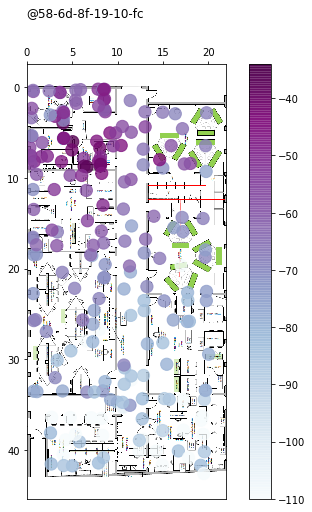

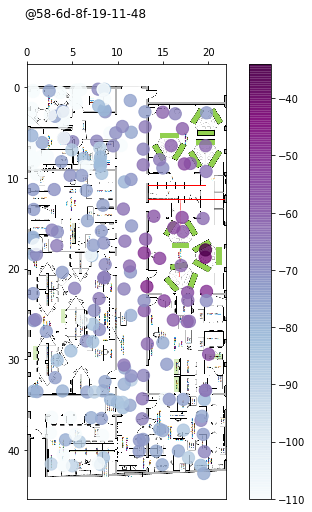

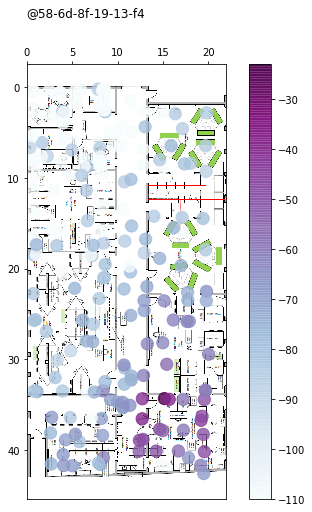

In [20]:
for ap in [ap for ap in features.columns if '@' in ap][:5]:
    
    fig, ax = plt.subplots()
    
    ax.imshow(flip, extent=[0, 22, 0, 43])
    fig.set_size_inches(8, 8)
    
    fig.suptitle(ap)
    plt.scatter(data=features, x=X_loc['abs_x'], y=X_loc['abs_y'], s=150, c=ap, alpha=0.8, cmap='BuPu')
    
    ax.set_ylim(ax.get_ylim()[::-1])
    ax.xaxis.tick_top()
    
    plt.colorbar()

## Opstellen van meerdere modellen en parameter tunning

De volgende stap is het opstellen van modellen die de targets voorspellen. Er zijn heel veel machine learning modellen die we kunnen gebruiken, we gaan een paar testen en zien welke best werken voor deze data. Het is meestal een goed idee om te beginnen met simpele model die makkelijk te interpreteren zijn, en als deze niet voldoenden zijn verder te gaan met meer complexe, maar vaak ook meer accurate modellen.

### Metrieke
Om te meten hoe goed een model het target voorspelt, is het belangrijk dat er op voorhand een metriek wordt vastgelegd voor het meten van het model. Hierdoor kunnen we beter de modellen onderling vergelijken.
- voor *classificatie* gebruiken we de **acuracy** als metriek, deze telt het aantal juist geclassificeerde data-elementen tot over de grootte van de test set.
- voor *regressie* gebruiken we de **R<sup>2<sup>**, de proportie verklaarde variantie van het regressiemodel.
De waardes voor beide metrieke liggen tussen 0 en 1, hoe hogere de waarde hoe beter het model het doet.

### Training en Test set
Voor dat we de modellen kunnen opbouwen moeten we de data opsplitsen in een trainings-set en test-set
1. De ***training set*** wordt geven aan ons model samen met de antwoorden. Het doel is voor het model om een mapping te leren tussen de features en de target.
2. De ***test set*** van de features wordt gebruikt om het model te evalueren. Het model voorspeld dan de waardes voor de target, deze worden dan geëvalueerd tegenover de werkelijke target waardes.

75% van de data wordt gebruikt in de trainings-set en 25% in de test-set

In [21]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_trainRoom, y_testRoom = train_test_split(features, X_room, random_state=42, test_size=0.25)
X_train, X_test, y_trainX, y_testX = train_test_split(features, X_loc['abs_x'], random_state=42, test_size=0.25)
X_train, X_test, y_trainY, y_testY = train_test_split(features, X_loc['abs_y'], random_state=42, test_size=0.25)


print("Training set:")
print("Vorm: {}".format(X_train.shape))
display(X_train.head())

print("\nTest set:")
print("Vorm: {}".format(X_test.shape))
display(X_test.head())

Training set:
Vorm: (160, 14)


,@38-43-7d-17-c3-3f,@3a-43-3d-17-c3-3f,@58-6d-8f-19-10-fc,@58-6d-8f-19-11-48,@58-6d-8f-19-13-f4,@58-6d-8f-19-14-38,@88-1d-fc-41-dc-50,@88-1d-fc-41-dc-52,@88-1d-fc-44-9c-20,@94-91-7f-5a-20-d2,@96-91-7f-5a-20-d3,@9c-97-26-98-ce-e7,@a2-c5-89-be-c2-b5,@c8-d7-19-6f-be-b7
154,-110.0,-110.0,-52.0,-110.0,-110.0,-83.0,-110.0,-110.0,-88.0,-69.0,-71.0,-81.0,-110.0,-71.0
182,-110.0,-110.0,-48.0,-110.0,-110.0,-76.0,-76.0,-110.0,-110.0,-79.0,-72.0,-110.0,-110.0,-55.0
120,-110.0,-110.0,-45.0,-84.0,-110.0,-79.0,-110.0,-110.0,-87.0,-93.0,-110.0,-110.0,-110.0,-70.0
148,-110.0,-110.0,-52.0,-70.0,-110.0,-78.0,-110.0,-110.0,-87.0,-67.0,-69.0,-78.0,-110.0,-63.0
40,-110.0,-110.0,-68.0,-66.0,-84.0,-64.0,-81.0,-81.0,-72.0,-110.0,-110.0,-84.0,-79.0,-78.0



Test set:
Vorm: (54, 14)


,@38-43-7d-17-c3-3f,@3a-43-3d-17-c3-3f,@58-6d-8f-19-10-fc,@58-6d-8f-19-11-48,@58-6d-8f-19-13-f4,@58-6d-8f-19-14-38,@88-1d-fc-41-dc-50,@88-1d-fc-41-dc-52,@88-1d-fc-44-9c-20,@94-91-7f-5a-20-d2,@96-91-7f-5a-20-d3,@9c-97-26-98-ce-e7,@a2-c5-89-be-c2-b5,@c8-d7-19-6f-be-b7
212,-110.0,-110.0,-49.0,-81.0,-110.0,-77.0,-110.0,-110.0,-82.0,-78.0,-81.0,-83.0,-110.0,-69.0
125,-110.0,-110.0,-58.0,-66.0,-82.0,-69.0,-110.0,-110.0,-69.0,-110.0,-110.0,-77.0,-110.0,-79.0
10,-85.0,-85.0,-83.0,-67.0,-39.0,-69.0,-66.0,-66.0,-72.0,-110.0,-110.0,-110.0,-62.0,-77.0
127,-110.0,-110.0,-60.0,-74.0,-78.0,-75.0,-80.0,-78.0,-76.0,-73.0,-75.0,-80.0,-110.0,-74.0
100,-110.0,-110.0,-54.0,-66.0,-81.0,-110.0,-87.0,-110.0,-110.0,-71.0,-72.0,-110.0,-110.0,-51.0


### Feature scaling

Soms is het nodig om de features te schalen voor het model opgebouwd word.  
We bekijken de range van al de features (zonder shalen) aan de hand van een boxplot.

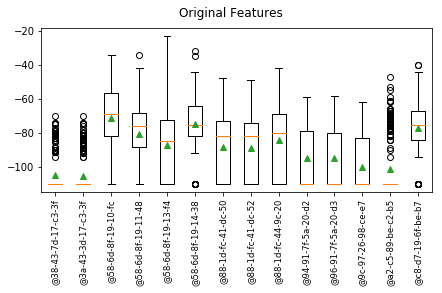

In [22]:
def featureBoxPlot(X, names, title):
    plt.rcParams['figure.figsize'] = [7,3]
    fig = plt.figure()
    fig.suptitle(title)
    ax = fig.add_subplot(111)
    plt.boxplot(X, showmeans=True)
    ax.set_xticklabels(names, fontsize=8.5, rotation=90)
    plt.show()
    return

featureBoxPlot(features.values, features.columns, 'Original Features')

Nu schalen we de features aan de hand van de **StandardScaler** en ook deze worden geplot aan de hand van een boxplot. We zien nu dat voor al de aces punten de metingen tussen -3 en 3 liggen.

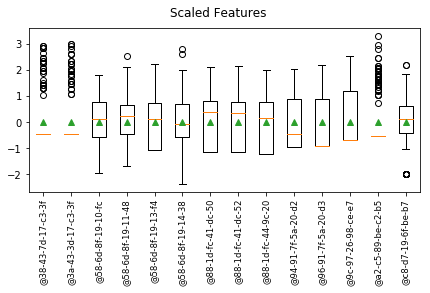

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

featureBoxPlot(X_train_scaled, features.columns, 'Scaled Features')

In [24]:
results = pd.DataFrame(columns=['methode', 'pred_val', 'paramters', 'train_score', 'test_score'])

## K-NN: k-Nearest Neighbors

K-NN is een heel simpel model. Wanneer een voorspelling gedaan moet gebeuren voor een nieuw datapunt wordt er in de dataset gezocht naar de dichtste bijzijnde buur (Wanner N = 1) of de k-dichtste buren (wanneer N=k).

We gaan dit model toepassen om de kamer te voorspellen aan de hand van een **K-NN classificatie model** en om de absolute x en y coördinaten te voorspellen aan de hand van een **K-NN regressie model**.

Er zijn 3 belangrijke parameters voor dit model:
- **n_neighbors:** het aantal buren
- **metric:** hoe de afstanden gemeten wordt tussen 2 elementen uit de data set (Euclidische afstand of Minkowski afstand)
- **weights:** het gewicht van de buren
    - *uniform:* elke buur heeft hetzelfde gewicht
    - *distance:* dichteren buren hebben een groter gewicht

### Classificatie Model

We gebruiken het classificatie K-NN model om de kamer target te voorspellen. Hieronder wordt het aantal buren op 1 gezet en de default afstand metriek (minkowski) gebruikt.

We gebruiken de ***accuracy*** om te meten hoe goed het model is. Dit telt het aantal juist geclassificeerde data elementen tot over grootte de testset.

In [25]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

knn = KNeighborsClassifier(n_neighbors=1)
display(knn.fit(X_train, y_trainRoom))

print("Training set score: {:.2f}".format(knn.score(X_train, y_trainRoom)))
print("Test set score: {:.2f}".format(knn.score(X_test, y_testRoom)))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

Training set score: 1.00
Test set score: 0.65


We bouwen nu exact hetzelfde model op maar geven het nu de geschaalde data om op te trainen. We zien hiermee de invloed op het model door gebruik te maken van geschaalde data.  

Voor dataset 3 is de score behaald hetzelfde, daarom gaan we verder met de niet geschaalde data. Dit is waarschijnlijk omdat de niet geschaalde data waardes bevat die allemaal in dezelfde range zitten.

In [26]:
knn_scaled = KNeighborsClassifier(n_neighbors=1)
display(knn_scaled.fit(X_train_scaled, y_trainRoom))

print("Training set score: {:.2f}".format(knn_scaled.score(X_train_scaled, y_trainRoom)))
print("Test set score: {:.2f}".format(knn_scaled.score(X_test_scaled, y_testRoom)))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

Training set score: 1.00
Test set score: 0.65


De waardes gegeven aan de parameters van het model hebben een invoed op de accuracy. In de volgende grafiek zien we de invloed van het aantal buren op het model. Al de andere parameters blijven op hun default waarden staan.  


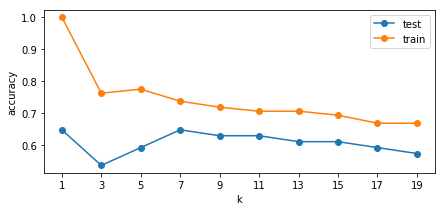

In [27]:
k_range = range(1, 20, 2)
test_scores = []
train_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_trainRoom)
    test_scores.append(knn.score(X_test, y_testRoom))
    train_scores.append(knn.score(X_train, y_trainRoom))
    
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_range, test_scores, 'o-', label='test')
plt.plot(k_range, train_scores, 'o-', label='train')
plt.xticks(k_range)
plt.legend()

#### Hyperparameter tunning

***Hypeparameters*** zijn parameters die op voorhand mee gegeven worden aan het learning algorithme, bijvoorbeeld bij K-NN het aantal buren.
De hypeparameters hebben een grote invloed op het model en de resultaten dat het bekomt. Het is de bedoeling om deze zo te kiezen dat men een balans vind tussen ***underfitting*** en ***overfitting***.

- ***Underfitting:*** het model is niet complex genoeg om de mapping van de features naar het target te vinden. Het zal niet goed scoren op de training en test data.
- ***Overfitting:*** het model is te specifiek gebouwd voor de trainingsdata. Het zal heel goed scoren op de trainingsdata maar niet op de testdata.

Voor het tunnen van de parameters gaan we gebruik maken van ***Grid Search*** en ***Cross Validation***

- ***Grid Search:*** zoekt de betere waarden van de parameters van het model.
- ***Cross Validation:*** de dataset wordt meerdere keren gesplitst in training en test set, zo wordt elke waarden is gebruikt in de test set.

De **GridSearchCV** modulen van sklearn gebruikt van grid search in combinatie met cross validation om de beste parameters te vinden voor ons model.

Er zijn 3 parameters dat we gaan tunnen voor het model: het aantal buren (n_neighbors), de afstand metriek (metric) en het gewicht van de buren. All de mogelijke combinaties worden overlopen en als resultaat krijgen we de meest optimale parameters voor dit model.

We gebruiken 3 folds voor de cross validatie.

In [28]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    'n_neighbors' : np.arange(1, 20),
    'weights' : ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan']
}

gs = GridSearchCV(KNeighborsClassifier(), grid_params, cv=3, return_train_score=True)

gs.fit(X_train, y_trainRoom)
print("Test set score: {:.2f}".format(gs.score(X_test, y_testRoom)))
print("Best parameters: {}".format(gs.best_params_))
print("Best cross-validation score: {:.2f}".format(gs.best_score_))
print("Best estimator:\n{}".format(gs.best_estimator_))

Test set score: 0.69
Best parameters: {'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}
Best cross-validation score: 0.67
Best estimator:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='distance')


C:\Users\melan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


#### Resultaat

Hier zien we de accuracy behaald op de training en test set met de optimaal getunnden parameters.  

De verkeerd geclassificeerde metingen worden weer gegeven in een tabel en een pie chart. 

We zien dat dit model doet aan overfitting. Het scoort heel goed op de trainingsdata maar niet op de test data.


Train score: 1.00
Test score: 0.69


,Actual,Predicted
1,lab6,lab5
7,gang,lab3
16,lab6,lab5
17,Datacenter,gang
19,lab6,D036
20,gang,lab1
23,lab6,Datacenter
25,gang,lab3
27,Datacenter,gang
29,Datacenter,gang


[]

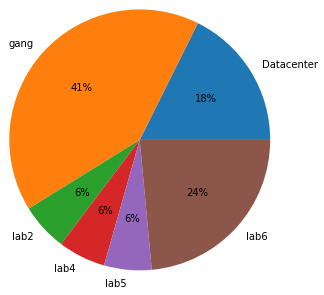

In [29]:
print('Train score: {:.2f}'.format(gs.score(X_train, y_trainRoom)))
print('Test score: {:.2f}'.format(gs.score(X_test, y_testRoom)))

predRoom = pd.DataFrame({'Actual':y_testRoom.values, 'Predicted':gs.predict(X_test)})

wrongs = predRoom.loc[predRoom['Actual'] != predRoom['Predicted']]
display(wrongs)

results = results.append({'methode': 'knn', 'pred_val': 'room', 'paramters': gs.best_params_, 
     'train_score': gs.score(X_train, y_trainRoom), 
                          'test_score': gs.score(X_test, y_testRoom)}, ignore_index=True)

df_pie = wrongs.groupby('Actual').count();

plt.pie(df_pie, labels=df_pie.index, radius=2, autopct='%1.0f%%')
plt.plot()

### Regressie Model

Het ***K-NN regressie model*** wordt gebruikt om de absolute X en absolute Y coördinaten te voorspellen. Dit model heeft dezelfde parameters als het ***K-NN classificatie model***.

#### Absolute y coördinaat

We doen een initiële test op het model met 1 buur.

In [30]:
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=1)
display(knn.fit(X_train, y_trainY))

print("Training set score: {:.2f}".format(knn.score(X_train, y_trainY)))
print("Test set score: {:.2f}".format(knn.score(X_test, y_testY)))

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=1, p=2,
          weights='uniform')

Training set score: 1.00
Test set score: 0.87


We gaan kijken naar de invloed van het aantal buren op het model aan de hand van de **elbow method**, hiermee plotten we de MSE tot over het aantal buren.   
Het laagste punt in de grafiek toont het optimaal aantal buren aan.

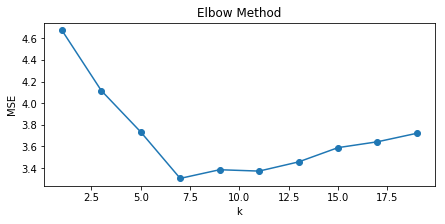

In [31]:
from math import sqrt
r = range(1,20,2)
rmse_val = []

for K in r:
    model = KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, y_trainY)  
    pred=model.predict(X_test)
    error = sqrt(mean_squared_error(y_testY,pred)) 
    rmse_val.append(error)

plt.title('Elbow Method')
plt.plot(r, rmse_val, 'o-')
plt.xlabel('k')
plt.ylabel('MSE')
plt.show()

De andere parameters kunnen ook nog geoptimaliseerd worden, dit doen we weet aan de hand van de **GridSearchCV** modulen van sklearn.

In [32]:
grid_params = {
    'n_neighbors' : np.arange(1, 11, 2),
    'weights' : ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan']
}

gs = GridSearchCV(KNeighborsRegressor(), grid_params, cv=3, return_train_score=True)

gs.fit(X_train, y_trainY)
print("Test set score: {:.2f}".format(gs.score(X_test, y_testY)))
print("Best parameters: {}".format(gs.best_params_))
print("Best cross-validation score: {:.2f}".format(gs.best_score_))
print("Best estimator:\n{}".format(gs.best_estimator_))

Test set score: 0.93
Best parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Best cross-validation score: 0.92
Best estimator:
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='distance')


C:\Users\melan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


#### Resultaat


In [33]:
print('Train score: {:f}'.format(gs.score(X_train, y_trainY)))
print('Test score: {:f}'.format(gs.score(X_test, y_testY)))

results = results.append({'methode': 'knn', 'pred_val': 'abs_y', 'paramters': gs.best_params_, 
     'train_score': gs.score(X_train, y_trainY), 'test_score': gs.score(X_test, y_testY)}, ignore_index=True)

Train score: 1.000000
Test score: 0.931271


#### Absolute x coördinaat

We doorlopen nu dezelfde stappen voor een K-NN model op te bouwen voor de absolute x coördinaten te voorspellen.

In [34]:
grid_params = {
    'n_neighbors' : np.arange(1, 11, 2),
    'weights' : ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan']
}

gs = GridSearchCV(KNeighborsRegressor(), grid_params, cv=3, return_train_score=True)

gs.fit(X_train_scaled, y_trainX)
print("Test set score: {:.2f}".format(gs.score(X_test_scaled, y_testX)))
print("Best parameters: {}".format(gs.best_params_))
print("Best cross-validation score: {:.2f}".format(gs.best_score_))
print("Best estimator:\n{}".format(gs.best_estimator_))

Test set score: 0.72
Best parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Best cross-validation score: 0.68
Best estimator:
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='distance')


C:\Users\melan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


#### Resultaat

In [35]:
print('Train score: {:f}'.format(gs.score(X_train_scaled, y_trainX)))
print('Test score: {:f}'.format(gs.score(X_test_scaled, y_testX)))

results = results.append({'methode': 'knn', 'pred_val': 'abs_x', 'paramters': gs.best_params_, 
     'train_score': gs.score(X_train_scaled, y_trainX), 'test_score': gs.score(X_test_scaled, y_testX)}, ignore_index=True)

Train score: 1.000000
Test score: 0.721531


## Lineaire Modellen

Het volgende model dat we gaan testen is het Lineair model. Hierbij worden de afhankelijke variabelen (features) gebruikt om een voorspelling te maken van de onafhankelijk variabelen (target).

Het klassieke lineair model probeert de parameters van het model zo op te stellen om de kostfunctie te minimaliseren. We gaan beginnen met dit lineair model aangezien dit het simpelste model is.

### Lineaire Classificatie

Eerst wordt een lineair classificatie model opgezet voor de kamer in de ICT-gang te voorspellen.  
Voor het model zetten we de **multi_class** parameter op auto, dit geeft mee dat het gaat om een multiclass classificatie probleem.

In [36]:
from sklearn.linear_model import LogisticRegression, LinearRegression

logisticRegr = LogisticRegression(solver='liblinear', multi_class = 'auto')

display(logisticRegr)
logisticRegr.fit(X_train, y_trainRoom)

print('Train score: {:.2f}'.format(logisticRegr.score(X_train, y_trainRoom)))
print('Test score: {:.2f}'.format(logisticRegr.score(X_test, y_testRoom)))

results = results.append({'methode': 'LogisticRegression', 'pred_val': 'room', 'paramters': logisticRegr, 
     'train_score': logisticRegr.score(X_train, y_trainRoom), 'test_score': logisticRegr.score(X_test, y_testRoom)}, ignore_index=True)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

Train score: 0.84
Test score: 0.63


### Regression

#### Absolute y coördinaat

Nu worden de lineaire regressie modellen opgesteld voor het voorspellen van de absolute x en y coördinaten.

In [37]:
lr = LinearRegression().fit(X_train, y_trainY)

display(lr)
print("Training set score: {:f}".format(lr.score(X_train, y_trainY)))
print("Test set score: {:f}".format(lr.score(X_test, y_testY)))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Training set score: 0.929572
Test set score: 0.925946


Hetzelfde model wordt nog is opgebouwd maar deze keer wordt het genormaliseerd door de normalisatie parameter op True te zetten.  
We zien dat dit geen effect heeft op de score van ons model.

In [38]:
# normalizatie
lr_norm = LinearRegression(normalize=True).fit(X_train, y_trainY)

display(lr_norm)
print("Training set score: {:f}".format(lr_norm.score(X_train, y_trainY)))
print("Test set score: {:f}".format(lr_norm.score(X_test, y_testY)))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

Training set score: 0.929572
Test set score: 0.925946


Er wordt ook is een Ridge en een Lasso model opgebouwd. Deze hebben ook geen invloed op de score van het model. We gaan dus gebruik maken van het klassiek LinearRegression model zonder normalisering.

In [39]:
from sklearn.linear_model import Ridge, Lasso

## Ridge
ridge = Ridge(alpha=0.1).fit(X_train, y_trainY)
display(ridge)
print("Training set score: {:f}".format(ridge.score(X_train, y_trainY)))
print("Test set score: {:f}".format(ridge.score(X_test, y_testY)))

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Training set score: 0.929572
Test set score: 0.925946


In [40]:
## Lasso
lasso = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_trainY)
display(lasso)
print("Training set score: {:f}".format(lasso.score(X_train, y_trainY)))
print("Test set score: {:f}".format(lasso.score(X_test, y_testY)))
print("Number of features used:", np.sum(lasso.coef_ != 0))

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=100000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Training set score: 0.929572
Test set score: 0.925946
Number of features used: 14


#### Resultaat

In [41]:
print("Score on training set: {:.2f}".format(lr.score(X_train, y_trainY)))
print("Score on test set: {:.2f}".format(lr.score(X_test, y_testY)))

results = results.append({'methode': 'LinearRegression', 'pred_val': 'abs_y', 'paramters': lr, 
     'train_score': lr.score(X_train, y_trainY), 'test_score': lr.score(X_test, y_testY)}, ignore_index=True)

Score on training set: 0.93
Score on test set: 0.93


#### Absolute x coördinaat

In [42]:
lr = LinearRegression().fit(X_train, y_trainX)

display(lr)
print("Training set score: {:.2f}".format(lr.score(X_train, y_trainX)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_testX)))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Training set score: 0.71
Test set score: 0.64


#### Resultaat

In [43]:
print("Accuracy on training set: {:.2f}".format(lr.score(X_train, y_trainX)))
print("Accuracy on test set: {:.2f}".format(lr.score(X_test, y_testX)))

results = results.append({'methode': 'LinearRegression', 'pred_val': 'abs_x', 'paramters': lr, 
     'train_score': lr.score(X_train, y_trainX), 'test_score': lr.score(X_test, y_testX)}, ignore_index=True)

Accuracy on training set: 0.71
Accuracy on test set: 0.64


## Decision Trees

Een decision tree gebruikt een hiërarchie van if-else-vragen die leid tot een beslissing. Deze kan gebruikt worden voor regressie en classificatie. De belangrijkste parameter voor dit model is de ***max_depth***, deze specificeert de maximum diepte van de boom.

### Classificatie

We beginnen met het classificatie probleem voor de kamer te voorspellen. We gebruiken eerst een max_depth van 4.

In [44]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_train, y_trainRoom)

print('Train score: {:.2f}'.format(clf.score(X_train, y_trainRoom)))
print('Test score: {:.2f}'.format(clf.score(X_test, y_testRoom)))

Train score: 0.41
Test score: 0.37


We herhalen nu dit model met de geschaalde features.  
De score wordt niet verbeterd door het schalen van de features dus we gaan door gaan met de niet geschaalde features.

In [45]:
clf_scaled = DecisionTreeClassifier(max_depth=4)
clf_scaled.fit(X_train_scaled, y_trainRoom)

print('Train score: {:.2f}'.format(clf_scaled.score(X_train_scaled, y_trainRoom)))
print('Test score: {:.2f}'.format(clf_scaled.score(X_test_scaled, y_testRoom)))

Train score: 0.41
Test score: 0.37


We kunnen de boom weergeven aan de hand van graphviz.

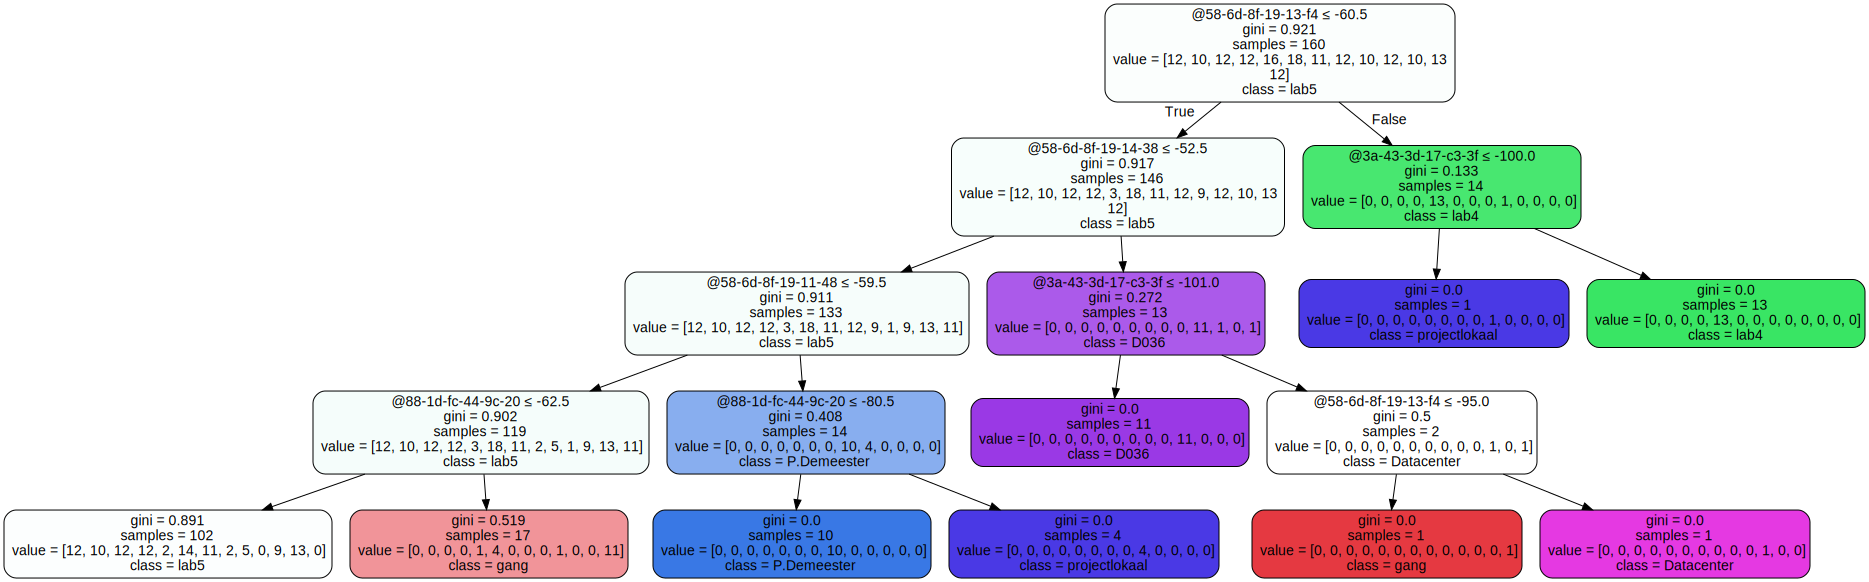

In [46]:
import graphviz

dot_data = tree.export_graphviz(clf, out_file=None, feature_names=features.columns.values,  
                                class_names=[o['name'] for o in rooms], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)  
graph

Mat een max_depth van 4 zien we dat dit model het niet zo goed doet. We gaan kijken of we aan de hand van ***GridSearchCV*** parameters vinden die een beter resultaat bekomen.

In [47]:
grid_params = {'max_depth': range(1,10),
              'random_state': range(5, 40,5)}

gs = GridSearchCV(DecisionTreeClassifier(), grid_params, cv=3, return_train_score=True)

gs.fit(X_train, y_trainRoom)
print("Test set score: {:.2f}".format(gs.score(X_test, y_testRoom)))
print("Best parameters: {}".format(gs.best_params_))
print("Best cross-validation score: {:.2f}".format(gs.best_score_))
print("Best estimator:\n{}".format(gs.best_estimator_))

Test set score: 0.48
Best parameters: {'max_depth': 9, 'random_state': 15}
Best cross-validation score: 0.53
Best estimator:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=15,
            splitter='best')


C:\Users\melan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


#### Resultaat


In [48]:
print("Accuracy on training set: {:.2f}".format(gs.score(X_train, y_trainRoom)))
print("Accuracy on test set: {:.2f}".format(gs.score(X_test, y_testRoom)))

results = results.append({'methode': 'decisiontree', 'pred_val': 'room', 'paramters': gs.best_params_, 
     'train_score': gs.score(X_train, y_trainRoom), 'test_score': gs.score(X_test, y_testRoom)}, ignore_index=True)

Accuracy on training set: 0.79
Accuracy on test set: 0.48


### Regressie

#### Absolute y coördinaat
Er wordt een Decision Tree regressie model opgezet voor het voorspellen van de absolute Y coördinaten.

In [49]:
grid_params = {'max_depth': range(1,10),
              'random_state': range(5, 40,5)}

gs = GridSearchCV(DecisionTreeRegressor(), grid_params, cv=3, return_train_score=True)

gs.fit(X_train, y_trainY)
print("Test set score: {:.2f}".format(gs.score(X_test, y_testY)))
print("Best parameters: {}".format(gs.best_params_))
print("Best cross-validation score: {:.2f}".format(gs.best_score_))
print("Best estimator:\n{}".format(gs.best_estimator_))

Test set score: 0.88
Best parameters: {'max_depth': 5, 'random_state': 30}
Best cross-validation score: 0.83
Best estimator:
DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=30, splitter='best')


C:\Users\melan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


#### Resultaat


In [50]:
print("Accuracy on training set: {:.2f}".format(gs.score(X_train, y_trainY)))
print("Accuracy on test set: {:.2f}".format(gs.score(X_test, y_testY)))

results = results.append({'methode': 'decisiontree', 'pred_val': 'abs_y', 'paramters': gs.best_params_, 
     'train_score': gs.score(X_train, y_trainY), 'test_score': gs.score(X_test, y_testY)}, ignore_index=True)

Accuracy on training set: 0.97
Accuracy on test set: 0.88


#### Absolute x cöordinaat

In [51]:
grid_params = {'max_depth': range(1,10),
              'random_state': range(5, 40,5)}

gs = GridSearchCV(DecisionTreeRegressor(), grid_params, cv=3, return_train_score=True)

gs.fit(X_train, y_trainX)
print("Test set score: {:.2f}".format(gs.score(X_test, y_testX)))
print("Best parameters: {}".format(gs.best_params_))
print("Best cross-validation score: {:.2f}".format(gs.best_score_))
print("Best estimator:\n{}".format(gs.best_estimator_))

Test set score: 0.67
Best parameters: {'max_depth': 9, 'random_state': 5}
Best cross-validation score: 0.39
Best estimator:
DecisionTreeRegressor(criterion='mse', max_depth=9, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=5, splitter='best')


C:\Users\melan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


#### Resultaat


In [52]:
print("Score on training set: {:.2f}".format(gs.score(X_train, y_trainX)))
print("Score on test set: {:.2f}".format(gs.score(X_test, y_testX)))

results = results.append({'methode': 'decisiontree', 'pred_val': 'abs_x', 'paramters': gs.best_params_, 
     'train_score': gs.score(X_train, y_trainX), 'test_score': gs.score(X_test, y_testX)}, ignore_index=True)

Score on training set: 0.98
Score on test set: 0.67


## Gradient boosting machines

Gradient boosting machines is het serieel schakelen van korte trees (1 tot 5 diep), waarbij een tree de fouten compenseert van de vorige tree. Dit model geeft typisch een hogere accuracy dan het standaard Decision Tree Model. We gaan kijken of dit het geval is voor deze data.

### Gradient Boosted Classification

In [53]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_trainRoom)

print(gbrt)
print("Score on training set: {:.3f}".format(gbrt.score(X_train, y_trainRoom)))
print("Score on test set: {:.3f}".format(gbrt.score(X_test, y_testRoom)))

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)
Score on training set: 1.000
Score on test set: 0.593


We kijken nu naar de feature importance van dit model

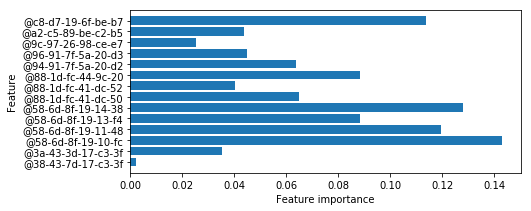

In [54]:
def plot_ap_feature_importance(model):
    n_features = X_train.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns.values)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    
plot_ap_feature_importance(gbrt)

We proberen dit model nog is te optimaliseren door de features te tunnen.

In [55]:
grid_params = {'n_estimators': [100], 
               'learning_rate': [0.1, 0.01, 0.001],
               'max_depth': range(3,6)}
               
gs = GridSearchCV(GradientBoostingClassifier(), grid_params, cv=3, return_train_score=True)

gs.fit(X_train, y_trainRoom)
print("Test set score: {:.2f}".format(gs.score(X_test, y_testRoom)))
print("Best parameters: {}".format(gs.best_params_))
print("Best cross-validation score: {:.2f}".format(gs.best_score_))
print("Best estimator:\n{}".format(gs.best_estimator_))

C:\Users\melan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Test set score: 0.56
Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best cross-validation score: 0.59
Best estimator:
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)


#### Resultaat

In [56]:
print("Score on training set: {:.2f}".format(gs.score(X_train, y_trainRoom)))
print("Score on test set: {:.2f}".format(gs.score(X_test, y_testRoom)))

results = results.append({'methode': 'gradientBoostingMachine', 'pred_val': 'room', 'paramters': gs.best_params_, 
     'train_score': gs.score(X_train, y_trainRoom), 'test_score': gs.score(X_test, y_testRoom)}, ignore_index=True)

Score on training set: 1.00
Score on test set: 0.56


### Gradient Boosted Regression

#### Absolute y coördinaat

We bekijken nu het regressie model voor het voorspellen van de absolute y coördinaten en bekijken ook de feature importance van al de features in dit model.

In [57]:
gbrt = GradientBoostingRegressor(random_state=0)
gbrt.fit(X_train, y_trainY)

display(gbrt)
print("Score on training set: {:.3f}".format(gbrt.score(X_train, y_trainY)))
print("Score on test set: {:.3f}".format(gbrt.score(X_test, y_testY)))

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=0, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

Score on training set: 0.995
Score on test set: 0.937


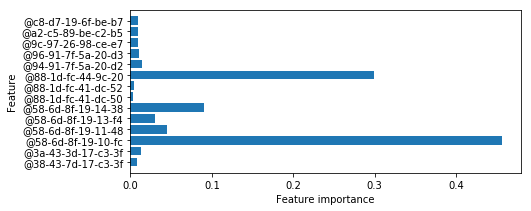

In [58]:
plot_ap_feature_importance(gbrt)

In [59]:
grid_params = {'n_estimators': [100], 
               'learning_rate': [0.1, 0.01, 0.001],
               'max_depth': range(3,6)}
               
gs = GridSearchCV(GradientBoostingRegressor(), grid_params, cv=3, return_train_score=True)

gs.fit(X_train, y_trainY)
print("Test set score: {:.2f}".format(gs.score(X_test, y_testY)))
print("Best parameters: {}".format(gs.best_params_))
print("Best cross-validation score: {:.2f}".format(gs.best_score_))
print("Best estimator:\n{}".format(gs.best_estimator_))

Test set score: 0.94
Best parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
Best cross-validation score: 0.89
Best estimator:
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)


C:\Users\melan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


#### Resultaat

In [60]:
print("Score on training set: {:.2f}".format(gs.score(X_train, y_trainY)))
print("Score on test set: {:.2f}".format(gs.score(X_test, y_testY)))

results = results.append({'methode': 'gradientBoostingMachine', 'pred_val': 'abs_y', 'paramters': gs.best_params_, 
     'train_score': gs.score(X_train, y_trainY), 'test_score': gs.score(X_test, y_testY)}, ignore_index=True)

Score on training set: 1.00
Score on test set: 0.94


#### Absolute x cöordinaat

Het regressie model voor de absolute X target wordt ook bekeken samen met de feauture importance.

In [61]:
gbrt = GradientBoostingRegressor(random_state=0)
gbrt.fit(X_train, y_trainX)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_trainX)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_testX)))

Accuracy on training set: 0.971
Accuracy on test set: 0.774


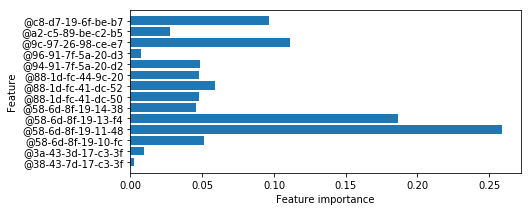

In [62]:
plot_ap_feature_importance(gbrt)

In [63]:
grid_params = {'n_estimators': [100], #range(1,6), 
               'learning_rate': [0.1, 0.01, 0.001],
               'max_depth': range(3,6)}
               
gs = GridSearchCV(GradientBoostingRegressor(), grid_params, cv=3, return_train_score=True)

gs.fit(X_train, y_trainX)
print("Test set score: {:.2f}".format(gs.score(X_test, y_testX)))
print("Best parameters: {}".format(gs.best_params_))
print("Best cross-validation score: {:.2f}".format(gs.best_score_))
print("Best estimator:\n{}".format(gs.best_estimator_))

Test set score: 0.80
Best parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
Best cross-validation score: 0.65
Best estimator:
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)


C:\Users\melan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


#### Resultaat

In [64]:
print("Score on training set: {:.2f}".format(gs.score(X_train, y_trainX)))
print("Score on test set: {:.2f}".format(gs.score(X_test, y_testX)))

results = results.append({'methode': 'gradientBoostingMachine', 'pred_val': 'abs_x', 'paramters': gs.best_params_, 
     'train_score': gs.score(X_train, y_trainX), 'test_score': gs.score(X_test, y_testX)}, ignore_index=True)

Score on training set: 0.99
Score on test set: 0.80


## 5. Evaluatie

De tabel geeft een overzicht van al de modellen dat getest zijn en hun behaalde scores.

De grafieken geven een grafisch overzicht van de scores behaald door de modellen per target.

#### Room

Voor dataset 3 werd de beste score behaald met het ***Logistic Regression*** model.

#### Absolute X coördinaat

Voor dataset 3 was het meest performante model voor het voorspellen van dit target ***Gradient Boosting Machine***.

#### Absolute Y coördinaat

Deze target behaalde de hoogste scores. Er waren een aantal modellen die een hoge score behaalden maar voor dataset 3 werd de beste score behaald door ***Gradient Boosting Machine***.

In [65]:
display(results.style.apply(lambda x: ['background: #90EE90' if x.iloc[4] > 0.9 else '' for i in x], axis=1))

,methode,pred_val,paramters,train_score,test_score
0,knn,room,"{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}",1,0.685185
1,knn,abs_y,"{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}",1,0.931271
2,knn,abs_x,"{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}",1,0.721531
3,LogisticRegression,room,"LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100, multi_class='auto', n_jobs=None, penalty='l2', random_state=None, solver='liblinear', tol=0.0001, verbose=0, warm_start=False)",0.8375,0.62963
4,LinearRegression,abs_y,"LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)",0.929572,0.925946
5,LinearRegression,abs_x,"LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)",0.714615,0.635764
6,decisiontree,room,"{'max_depth': 9, 'random_state': 15}",0.7875,0.481481
7,decisiontree,abs_y,"{'max_depth': 5, 'random_state': 30}",0.967443,0.877951
8,decisiontree,abs_x,"{'max_depth': 9, 'random_state': 5}",0.976463,0.669935
9,gradientBoostingMachine,room,"{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}",1,0.555556


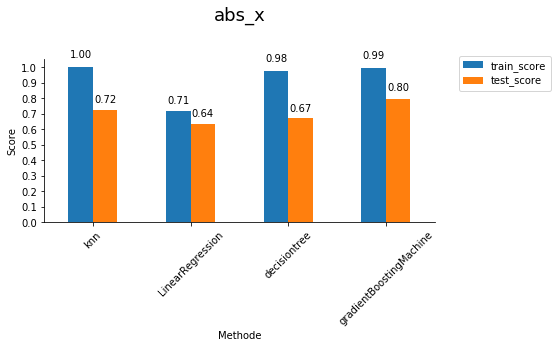

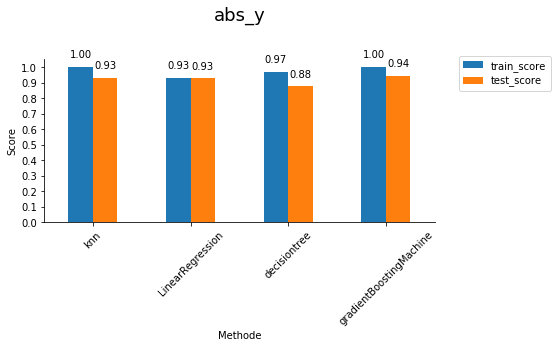

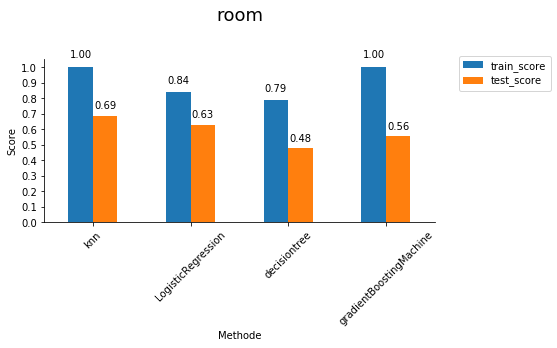

In [66]:
def label(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height, "%.2f" % height,
                ha='center', va='bottom')
    

for name, group in results.groupby('pred_val'):
    ax = group.plot(x='methode', y=['train_score', 'test_score'], kind="bar")
    plt.title(name, y=1.2, fontsize=18)
    plt.xlabel('Methode')
    plt.ylabel('Score')
    plt.xticks(rotation=45)
    plt.yticks(np.arange(0, 1.1, 0.1))
    ax.legend(bbox_to_anchor=(1.05, 1.05))
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    rects = ax.patches
    label(rects)